<a href="https://colab.research.google.com/github/onevay/Tg_Bot_Topic_Analyze/blob/main/gipotez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/dataset_for_sirius.csv', sep=';')

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
df = data.copy()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('dark_background')
plt.rcParams.update({
    'axes.facecolor': 'black',
    'figure.facecolor': '0.1',
    'grid.color': 'yellow',
    'grid.alpha': 0.3,
    'axes.edgecolor': 'yellow',
    'xtick.color': 'yellow',
    'ytick.color': 'yellow',
    'axes.labelcolor': 'yellow',
    'text.color': 'yellow'
})

In [ ]:
from sklearn.preprocessing import LabelEncoder
binary_cols = ['Private', 'IFL', 'Strahovanie_ipoteki', 'Oteli', 'Kasko', 'Karshering', 'VZR',
               'Sovmestnyj_schet', 'Vklad', 'IIS', 'Premium', 'Travel',
               'Oplatil_toplivo_v_Tinkoff_Gorod', 'Sharing_scheta', 'Oplatil_shtraf',
               'Avtoplatezh', 'LifeStyle', 'Kubyshka', 'Popolnjal_brokerskij',
               'Dopka_na_3_litso', 'Biznes_schet', 'Osago', 'Poluchaet_ZP',
               'Privel_druga', 'used_special_offer', 'ZhKH', 'Poluchil_mezhbankovskij_perevod',
               'Podpiski_na_servisy', 'Junior', 'Est\'_mobajl', 'Investkopilka', 'Pro',
               'Nakopitel\'nyj_schet', 'Taksi', 'NS_keptivnaja_strahovka',
               'Popolnil_v_bankomate', 'Zapravki', 'Podpiska_na_shtrafy',
               'Brokerskij_schet', 'Perevod_po_telefonu_karte_so_sbera', 'Dostavka_edy',
               'Odezhda_elektronika', 'Oplata_SBP_po_QR', 'Ecom', 'Obschestvennyj_transport',
               'Internet', 'Mobil\'naja_svjaz\'', 'Kafe_restorany_fastfud',
               'Onlajn_tranzaktsija', 'Kreditnyj_produkt', 'Ishodjaschij_SBP_perevod',
               'Supermarket', 'Poluchil_vhodjaschij_SBP', 'Est\'_DK']

le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
social_features = [
    'party_rk_count', 'Mobajl_kontaktnyj_nomer', 'count_top_friends',
    'max_count_of_close_mob', 'Privel_druga', 'used_special_offer',
    'median_friend_lifetime', 'avg_friend_lifetime', 'Podpiski_na_servisy',
    'Sovmestnyj_schet', 'Sharing_scheta', 'count_of_utils_mob'
]

<ipython-input-56-588de6f3e5c0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='party_rk_count', data=df, showfliers=False, palette='viridis')


Text(0, 0.5, 'Количество друзей')

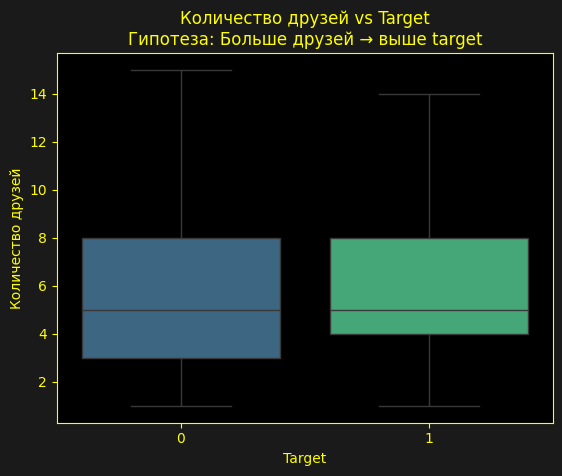

In [ ]:
sns.boxplot(x='target', y='party_rk_count', data=df, showfliers=False, palette='viridis')
plt.title('Количество друзей vs Target\nГипотеза: Больше друзей → выше target')
plt.xlabel('Target')
plt.ylabel('Количество друзей')

<ipython-input-57-f9039e60c029>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Privel_druga', y='target', data=df, ci=None, palette='pastel')
<ipython-input-57-f9039e60c029>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Privel_druga', y='target', data=df, ci=None, palette='pastel')


(0.0, 1.0)

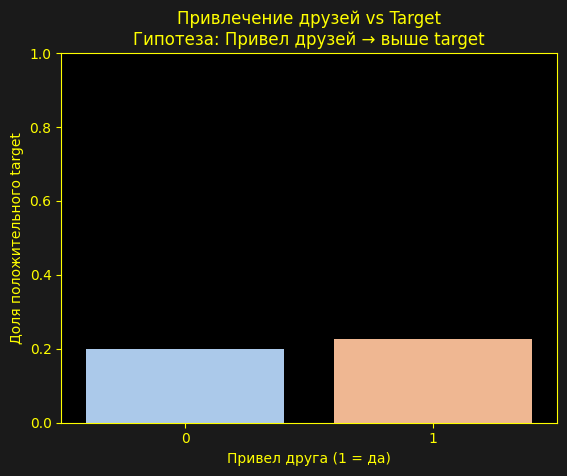

In [ ]:
sns.barplot(x='Privel_druga', y='target', data=df, ci=None, palette='pastel')
plt.title('Гипотеза: Привел друзей = выше target')
plt.xlabel('Привел друга (1 = да)')
plt.ylabel('Доля положительного target')
plt.ylim(0, 1)

Text(0, 0.5, 'Макс. близких моб. контактов')

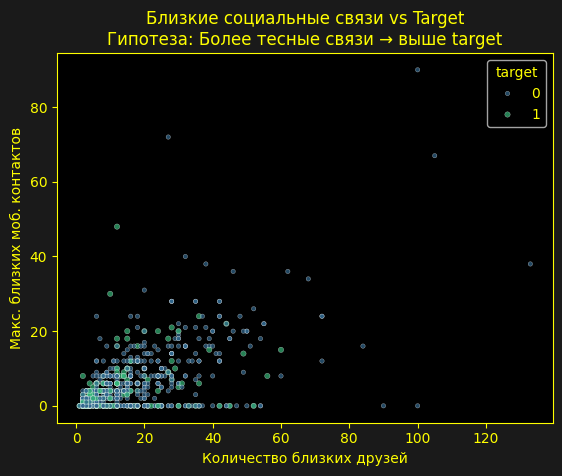

In [ ]:
sns.scatterplot(data=df.sample(1000), x='count_top_friends', y='max_count_of_close_mob',
                hue='target', size='target', sizes=(15, 10), alpha=0.7, palette='viridis')
plt.title('Близкие социальные связи vs Target\nГипотеза: Более тесные связи → выше target')
plt.xlabel('Количество близких друзей')
plt.ylabel('Макс. близких моб. контактов')

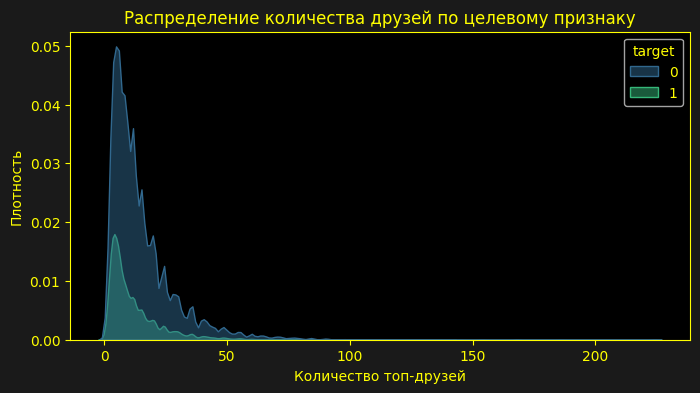

In [ ]:
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df, x='count_top_friends', hue='target', fill=True, alpha=0.5, palette='viridis')
plt.title('Распределение количества друзей по целевому признаку')
plt.xlabel('Количество топ-друзей')
plt.ylabel('Плотность')
plt.show()

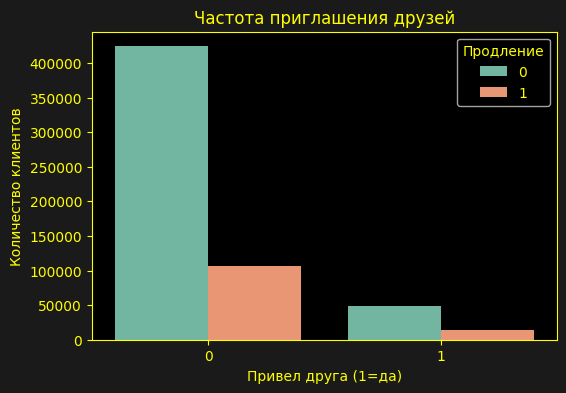

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Privel_druga', hue='target', palette='Set2')
plt.title('Частота приглашения друзей')
plt.xlabel('Привел друга (1=да)')
plt.ylabel('Количество клиентов')
plt.legend(title='Продление')
plt.show()

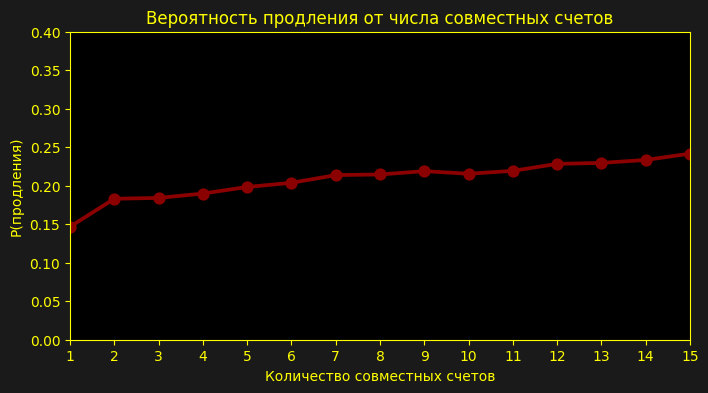

In [ ]:
plt.figure(figsize=(8, 4))
sns.pointplot(data=df, x='party_rk_count', y='target', errorbar=None, color='darkred')
plt.title('Вероятность продления от числа совместных счетов')
plt.xlabel('Количество совместных счетов')
plt.ylabel('P(продления)')
plt.xlim(0, 14)
plt.ylim(0, 0.4)
plt.show()

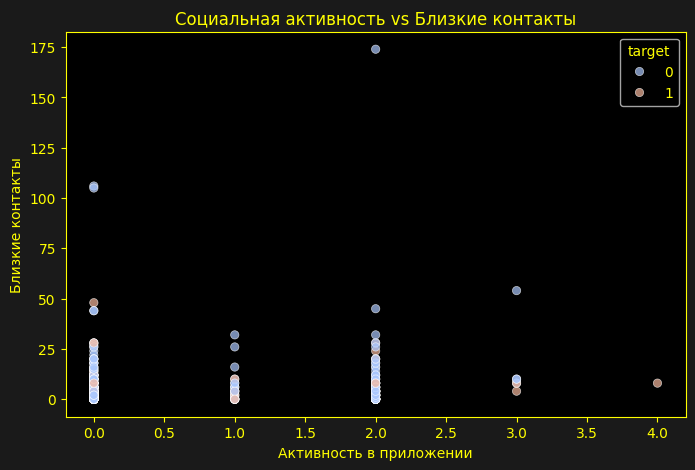

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df.sample(500),
    x='count_of_utils_mob',
    y='max_count_of_close_mob',
    hue='target',
    palette='coolwarm',
    alpha=0.7
)
plt.title('Социальная активность vs Близкие контакты')
plt.xlabel('Активность в приложении')
plt.ylabel('Близкие контакты')
plt.show()

<ipython-input-77-4ccee1f103f1>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




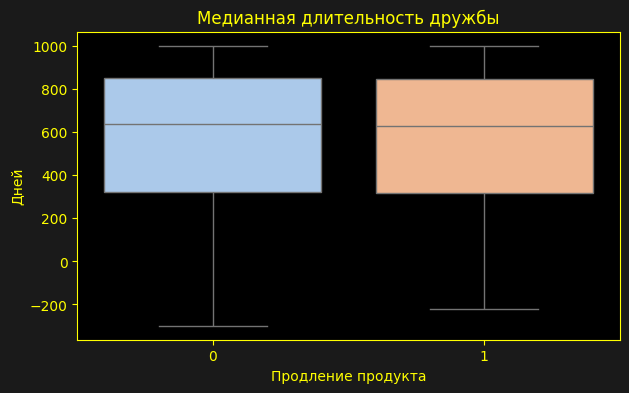

In [ ]:
plt.figure(figsize=(7, 4))
sns.boxplot(
    data=df[df['median_friend_lifetime'] < 1000],
    x='target',
    y='median_friend_lifetime',
    palette='pastel'
)
plt.title('Медианная длительность дружбы')
plt.xlabel('Продление продукта')
plt.ylabel('Дней')
plt.show()

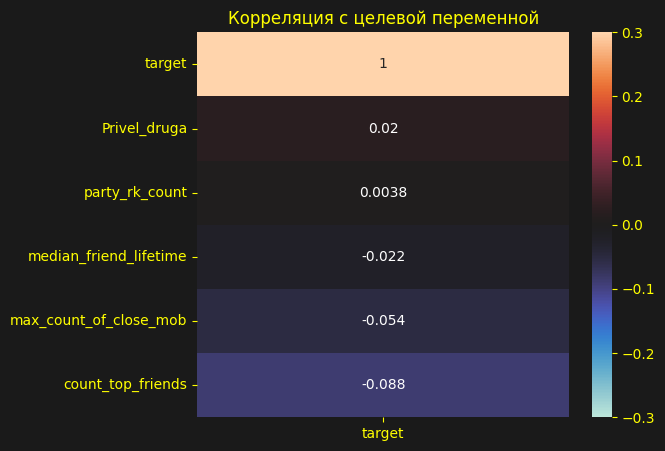

In [ ]:
social_cols = [
    'count_top_friends',
    'party_rk_count',
    'max_count_of_close_mob',
    'Privel_druga',
    'median_friend_lifetime'
]

plt.figure(figsize=(6, 5))
sns.heatmap(
    df[social_cols + ['target']].corr()[['target']].sort_values('target', ascending=False),
    annot=True,
    cmap='icefire',
    vmin=-0.3,
    vmax=0.3
)
plt.title('Корреляция с целевой переменной')
plt.show()

<ipython-input-91-98f7f23637ac>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




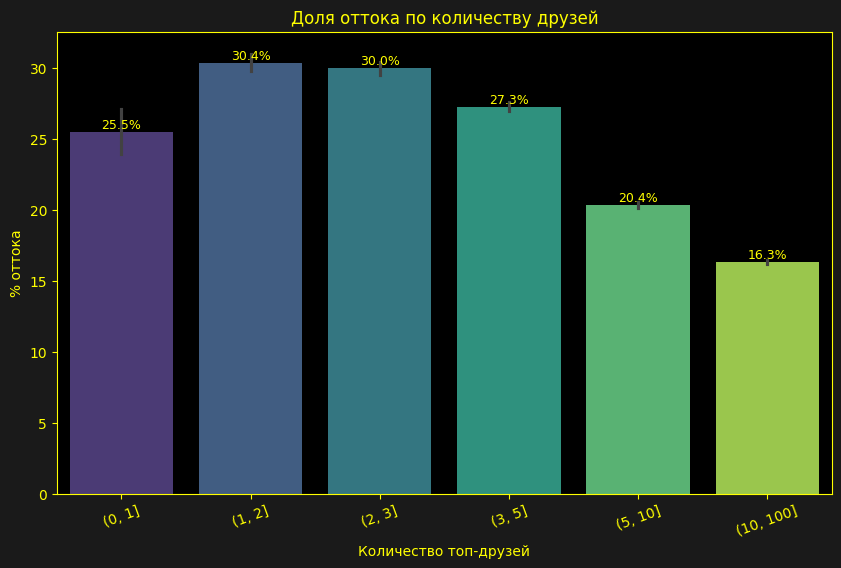

In [ ]:
import numpy as np

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df,
    x=pd.cut(df['count_top_friends'], bins=[0,1,2,3,5,10,100]),
    y='target',
    estimator=lambda x: np.mean(x)*100,
    palette='viridis'
)
plt.title('Доля оттока по количеству друзей')
plt.xlabel('Количество топ-друзей')
plt.ylabel('% оттока')
plt.xticks(rotation=20)

# Добавляем проценты на столбцы
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=9)
plt.show()

<ipython-input-83-b7d888c92ea9>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




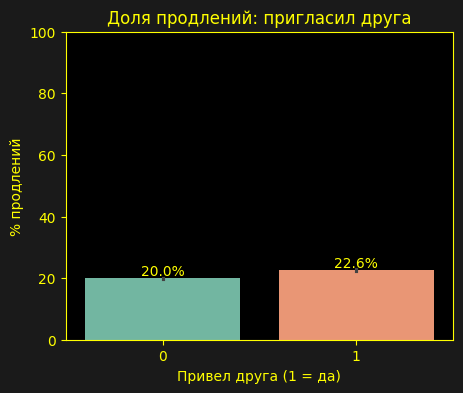

In [ ]:
plt.figure(figsize=(5, 4))
ax = sns.barplot(
    data=df,
    x='Privel_druga',
    y='target',
    estimator=lambda x: np.mean(x)*100,
    palette='Set2'
)
plt.title('Доля продлений: пригласил друга')
plt.xlabel('Привел друга (1 = да)')
plt.ylabel('% продлений')
plt.ylim(0, 100)

# Добавляем проценты
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')
plt.show()

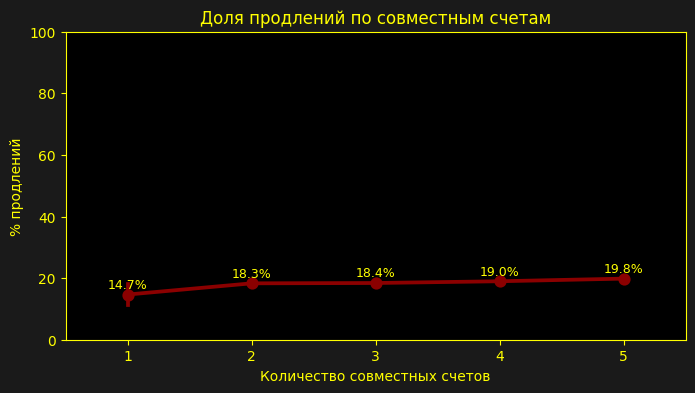

In [ ]:
plt.figure(figsize=(8, 4))
ax = sns.pointplot(
    data=df[df['party_rk_count'] <= 5],
    x='party_rk_count',
    y='target',
    estimator=lambda x: np.mean(x)*100,
    color='darkred'
)
plt.title('Доля продлений по совместным счетам')
plt.xlabel('Количество совместных счетов')
plt.ylabel('% продлений')
plt.ylim(0, 100)

for x, y in enumerate(ax.get_lines()[0].get_ydata()):
    plt.text(x, y+2, f'{y:.1f}%', ha='center', fontsize=9)
plt.show()

<ipython-input-90-055369ddc657>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




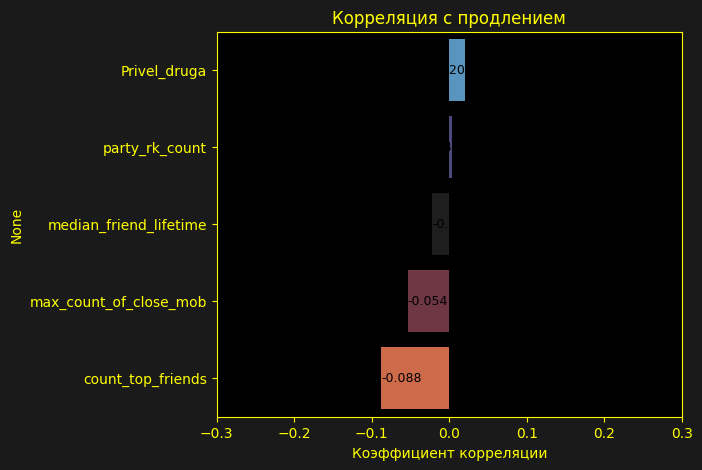

In [ ]:
plt.figure(figsize=(6, 5))
corr = df[social_cols].corrwith(df['target']).sort_values(ascending=False)
sns.barplot(x=corr.values, y=corr.index, palette='icefire')
plt.title('Корреляция с продлением')
plt.xlabel('Коэффициент корреляции')
plt.xlim(-0.3, 0.3)

# Добавляем значения
for i, v in enumerate(corr):
    plt.text(v, i, f'{v:.3f}', ha='left' if v < 0 else 'right',
             va='center', fontsize=9,
             color='white' if abs(v) > 0.15 else 'black')
plt.show()

<ipython-input-101-bcd1d24fb74a>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




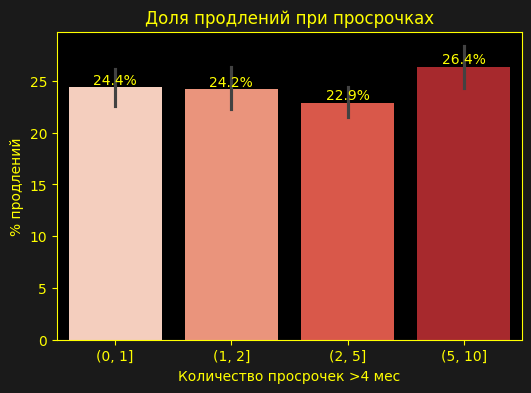

In [ ]:
plt.figure(figsize=(6, 4))
ax = sns.barplot(
    data=df,
    x=pd.cut(df['delay_m4_cnt'], [0, 1, 2, 5, 10]),
    y='target',
    estimator=lambda x: np.mean(x)*100,
    palette='Reds'
)
plt.title('Доля продлений при просрочках')
plt.xlabel('Количество просрочек >4 мес')
plt.ylabel('% продлений')

# Добавляем проценты
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')
plt.show()

In [ ]:
credit_cols = [
    'credit_amt_norm_cls_max',
    'delay_m4_cnt',
    'accnt_rev_cnt',
    'credit_amt_opn_rev_sum',
    'days_cred_use_sum'
]

plt.figure(figsize=(6, 4))
corr = df[credit_cols].corrwith(df['target']).sort_values(ascending=False)
sns.barplot(x=corr.values, y=corr.index, palette='coolwarm')
plt.title('Корреляция кредитных показателей с продлением')
plt.xlabel('Коэффициент корреляции')
plt.xlim(-0.3, 0.3)

# Добавляем значения
for i, v in enumerate(corr):
    plt.text(v, i, f'{v:.3f}',
             ha='left' if v < 0 else 'right',
             va='center',
             fontsize=9,
             color='white' if abs(v) > 0.1 else 'black')
plt.show()

ValueError: could not convert string to float: '<500'

<Figure size 600x400 with 0 Axes>